In [ ]:
# import all the required modules
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, bartlett
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

We want now to test the claim that wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.
We can follow the following steps to prove this claim;
* Data preperation
* Normality test
* Homogeneity of Variance Test
* Hypothesis Test




In [ ]:
# load the dataset
wine_df = pd.read_csv('/content/sample_data/winequality-red.csv', delimiter=';')

In [ ]:
# preview the first five
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We now extract the relevant columns 'quality' and 'alcohol'.
We convert 'quality' column into categorical values by binning the values into two groups; 'high quality' & 'low quality'


In [ ]:
wine_df['quality_category'] = np.where(wine_df['quality'] > np.median(wine_df['quality']), 'high quality', 'low quality')
wine_alcohol_df = wine_df[['quality_category', 'alcohol']]
wine_alcohol_df.head()

,quality_category,alcohol
0,low quality,9.4
1,low quality,9.8
2,low quality,9.8
3,low quality,9.8
4,low quality,9.4


### Perform a normality test
By either;
* Plotting
* normtest()
* Shapiro-Wilk Test
* Q-Q plots


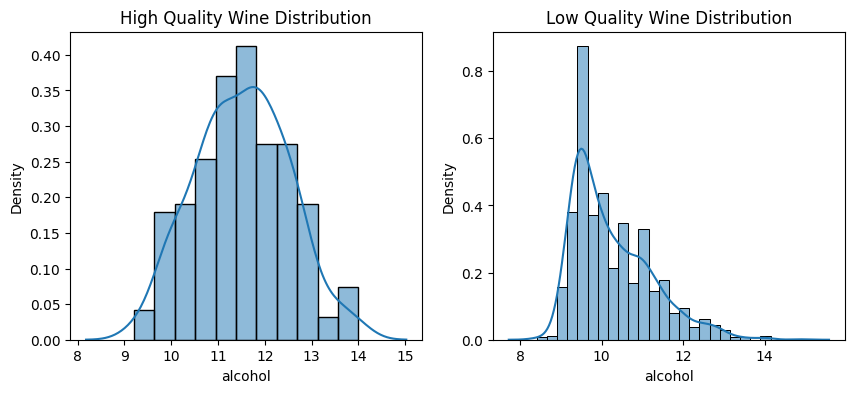

In [ ]:
from pandas.io.formats import style
# Plotting
high_quality_alcohol = wine_alcohol_df[wine_alcohol_df['quality_category'] == 'high quality']['alcohol']
low_quality_alcohol = wine_alcohol_df[wine_alcohol_df['quality_category'] == 'low quality']['alcohol']

fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.histplot(high_quality_alcohol, kde=True, stat='density', kde_kws=dict(cut=3), ax=ax[0])
sns.histplot(low_quality_alcohol, kde=True, stat='density', kde_kws=dict(cut=3), ax=ax[1])
ax[0].set_title('High Quality Wine Distribution')
ax[1].set_title('Low Quality Wine Distribution')
plt.show()

From the above plots, it is evident that the high quality wine data is normally distributed as the shape of the histogram and its corresponding cdf line show a bell shaped distribution. 
The dataset for low quality wine is skewed to the right. This can be clearly seen where we have a longer tail to the right.

In [ ]:
# Testing the same using the normtest()
high_quality_normaltest_result = stats.normaltest(high_quality_alcohol)
low_quality_normaltest_result = stats.normaltest(low_quality_alcohol)
p_value_highq = high_quality_normaltest_result[1]
p_value_lowq = low_quality_normaltest_result[1]

if p_value_highq < 0.05:
  print(f'Since {p_value_highq} < 0.05,  The high quality wine data is not normally distributed:')
else:
  print('The high quality wine dataset is normally distributed:')
if p_value_highq < 0.05:
  print(f'Since {p_value_lowq} < 0.05, The low quality wine data is not normally distributed:')
else:
  print('The low quality wine dataset is normally distributed:')

The high quality wine dataset is normally distributed:
The low quality wine dataset is normally distributed:


In [ ]:
# The shapiro-Wilk Test
print("High Quality Shapiro Results:", shapiro(high_quality_alcohol))
print("High Quality Shapiro Results:", shapiro(low_quality_alcohol))

p_value_shapiro_high = shapiro(high_quality_alcohol)[1]
p_value_shapiro_low = shapiro(low_quality_alcohol)[1]


High Quality Shapiro Results: ShapiroResult(statistic=0.9914323687553406, pvalue=0.23225747048854828)
High Quality Shapiro Results: ShapiroResult(statistic=0.9142929911613464, pvalue=3.003795319284013e-27)


In [ ]:
if p_value_shapiro_high < 0.05:
  print(f'Since {p_value_shapiro_high} < 0.05,  The high quality wine data is not normally distributed')
else:
  print('The high quality wine dataset is normally distributed:')
if p_value_shapiro_low < 0.05:
  print(f'Since {p_value_shapiro_low} < 0.05, The low quality wine data is not normally distributed')
else:
  print('The low quality wine dataset is normally distributed:')

The high quality wine dataset is normally distributed:
Since 3.003795319284013e-27 < 0.05, The low quality wine data is not normally distributed


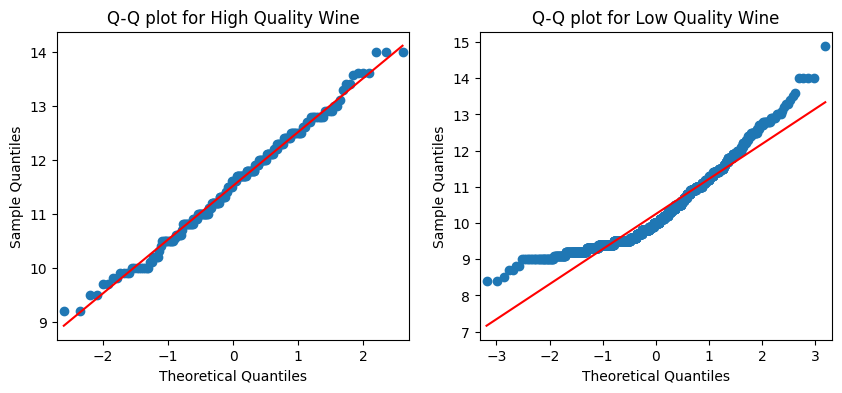

In [ ]:
# Q_Q Plots 
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.qqplot(high_quality_alcohol, line='s', ax=ax[0])
ax[0].set_title('Q-Q plot for High Quality Wine')
sm.qqplot(low_quality_alcohol, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot for Low Quality Wine')

plt.show()

From the above Q-Q plots we can see that the high quality wine data points are closer to the red line, which indicates that the data is normally distributed

In the second plot, the low quality wine data points are slighly far from the red line, which indicates that the data is not normally distributed

### Homegeneity of Variances
* Levene Test
* Bartlett Test
* Boxplot


In [ ]:
# Levene Test
print('Levene Test Results: ', levene(high_quality_alcohol, low_quality_alcohol))
p_value_levene_test = levene(high_quality_alcohol, low_quality_alcohol)[1]
if p_value_levene_test < 0.05:
  print('Since', round(p_value_levene_test, 2), '< 0.05, We can conclude that high quality and low quality wine data are not significantly different from each other')
else:
  print('Since ', round(p_value_levene_test, 2), ' > 0.05 , We can conclude that high quality and low quality wine data are significantly different.')

Levene Test Results:  LeveneResult(statistic=1.4506052991623122, pvalue=0.2286093177882187)
Since  0.23  > 0.05 , We can conclude that high quality and low quality wine data are significantly different.


In [ ]:
# Bartletts Test
stats, p_value_bartletts = bartlett(high_quality_alcohol, low_quality_alcohol)
if p_value_bartletts < 0.05:
  print('Since', round(p_value_bartletts, 2),  '< 0.05, We can conclude that high quality and low quality wine data are not significantly different from each other')
else:
  print('Since ', round(p_value_bartletts, 2), ' > 0.05 , We can conclude that high quality and low quality wine data are significantly different.')

Since  0.57  > 0.05 , We can conclude that high quality and low quality wine data are significantly different.


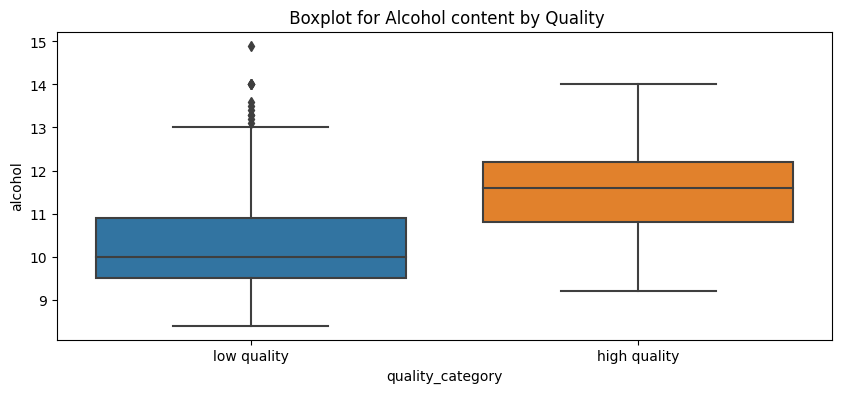

In [ ]:
# Boxplot
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x='quality_category', y='alcohol', data=wine_alcohol_df, ax = ax)
ax.set_title(' Boxplot for Alcohol content by Quality')

plt.show()

### Testing the hypothesis
H0: wines with a higher quality rating have the same median alcohol content as wines with a lower quality rating.

Ha: wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

In [ ]:
# t_test_ind
stats, p_value_ttest = ttest_ind(high_quality_alcohol, low_quality_alcohol)
if p_value_ttest < 0.05:
  print('Since', p_value_ttest, '< 0.05, We reject the null hypothesis and therefore conclude that \
wines with a higher quality rating have a higher median alcohol content than wines with lower quality rating')
else:
  print('Fail to reject the null hypothesis.')

Since 6.016774226316707e-65 < 0.05, We reject the null hypothesis and therefore conclude that wines with a higher quality rating have a higher median alcohol content than wines with lower quality rating


In [ ]:
# mannwhitneyu Test
stats, p_value_mannwhitney = mannwhitneyu(high_quality_alcohol, low_quality_alcohol)
if p_value_mannwhitney < 0.05:
  print('Since', p_value_mannwhitney, '< 0.05, We reject the null hypothesis and therefore conclude that \
wines with a higher quality rating have a higher median alcohol content than wines with lower quality rating')
else:
  print('Fail to reject the null hypothesis.')

Since 6.836147289253184e-53 < 0.05, We reject the null hypothesis and therefore conclude that wines with a higher quality rating have a higher median alcohol content than wines with lower quality rating


### Conclusion
Based on the above statistical tests, we can reject the null hypothesis and conclude that wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.